# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s). The base class is `pointillize` and can load directories or single images, and includes the primary methods:
* `plotRecPoints()` plots rectangular arrays of circles of fixed radius
* `plotRandomPoints()` plots random circles of random radius
* `plotRandomPointsComplexity()` plots random circles with radius based on complexity of source image in that area

In addition, the subclass `pointillizeStack` contains methods for building a workflow of image manipulations and then saving gif animations of either the construction of the image or of the final result constructed repeatedly to produce a kind of fluid final picture. Currently only implemented to work on single images. Its subclass `pointillizePile` however is implemented to operate in serial on a large list of images and supports saving gifs in batches as well. 

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found here: https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3

## Import class definitions

In [1]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

# Usage examples

## 1) Read image, run routines to pointillize, and save result

In [3]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
#point.display(original=True)

In [4]:
# Plot rectangular grid of overlapping circles to fill canvas
#point.plotRecPoints(n=40, multiplier=1, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=1e5, constant=0.025, power=1, alpha=int(0.1*255))  

plotRandomPointsComplexity: done...took 150.37 sec


In [ ]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 2) Build image stacks using `pointillizeStack` and save as gif of intermediate images

In [5]:
# Create instance
point = pointillizeStack(location='images/IMG_0116.jpg', debug = True, border = 0)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [6]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.5)

In [7]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 3) Build image stacks using `pointillizeStack` and save as gif of final images

In [8]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [9]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [10]:
# Display
HTML('<img src="gifs/animated_stacking_loop.gif">')

## 4) Build image stacks using `pointillizeStack` and save as gif of multiplied images

In [11]:
point = pointillizeStack(location='images/IMG_0116.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1000,500], resize=False)

In [12]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3)

plotRecPoints: done...took 0.77 sec
plotRandomPointsComplexity: done...took 51.63 sec


In [13]:
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.build_multipliers(multipliers)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


In [14]:
point.save_gif('gifs/pointqueue.gif',0.1)

In [15]:
HTML('<img src="gifs/pointqueue.gif">')

## 5. Bulk image processing with `pointillizePile`

In [16]:
# Create instance on directory
point = pointillizePile(location='images/', debug = True, border = 0)

### Images

In [17]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[960,540], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save
point.run_pile_images(location = 'images_out', suffix = 'no border')

Batch processing image: 1 2 3 4 done


### Loop GIFs

In [18]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'images_out/gifs', n=10, save_steps = False, step_duration = 0.1, suffix = 'loop')

1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 done


### Assembly gifs

In [19]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'images_out/gifs', n=1, save_steps = True, step_duration = 0.5, suffix = 'assembly')

1 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
2 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
3 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
4 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


### Multiplier gifs

In [20]:
# Create instance on directory
point = pointillizePile(location='images/', debug=True, border=0, queue=True)

In [21]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in multiplier mode
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.run_pile_multipliers(location = 'images_out/gifs', multipliers = multipliers,
                           step_duration = 0.1, suffix = 'muliplier')

1 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


# WORKING

# Implementing Gausian instead of complexity function

## Profiling base case

In [363]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

In [346]:
then = time.time()
point._makeProbabilityMask(0.01, power = 1.3)
print('took %0.2f seconds' %(time.time() - then))

took 1.38 seconds


In [591]:
%prun point.plotRandomPointsComplexity(n=1e5, constant=0.015, power=1.3, alpha='currently_hardcoded')  

plotRandomPointsComplexity: done...took 85.17 sec
 

In [ ]:
"""Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  3000000   21.488    0.000   21.488    0.000 {built-in method numpy.core.multiarray.array}
   100000   10.985    0.000   38.390    0.000 pointillism.py:218(_getComplexityOfPixel)
   100000    8.221    0.000   25.306    0.000 pointillism.py:140(_getColorOfPixel)
   900000    6.913    0.000   35.211    0.000 index_tricks.py:26(ix_)
   100000    5.220    0.000    5.220    0.000 {method 'draw_ellipse' of 'ImagingDraw' objects}
   900000    4.939    0.000    4.939    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   100000    4.070    0.000    4.070    0.000 {method 'paste' of 'ImagingCore' objects}
        1    2.947    2.947   85.183   85.183 pointillism.py:245(plotRandomPointsComplexity)
  1351821    2.649    0.000    2.649    0.000 pointillism.py:353(_testProbability)
  2700000    2.243    0.000    3.756    0.000 numerictypes.py:728(issubdtype)
  2700000    2.058    0.000    2.058    0.000 {method 'reshape' of 'numpy.ndarray' objects}
   300000    1.508    0.000    4.784    0.000 _methods.py:53(_mean)
   100000    1.086    0.000   40.221    0.000 pointillism.py:162(_plotColorPoint)
  6000000    0.895    0.000    0.895    0.000 {built-in method builtins.issubclass}
   300000    0.871    0.000    0.923    0.000 _methods.py:43(_count_reduce_items)
   100000    0.832    0.000    0.832    0.000 {built-in method PIL._imaging.fill}
  2700000    0.753    0.000   22.068    0.000 numeric.py:463(asarray)
  2700000    0.728    0.000    1.165    0.000 numerictypes.py:660(issubclass_)
   100000    0.549    0.000    0.549    0.000 pointillism.py:240(_getRadiusFromComplexity)
   100000    0.494    0.000    5.102    0.000 Image.py:1274(paste)
   800001    0.415    0.000    0.415    0.000 {built-in method builtins.hasattr}
   100000    0.414    0.000    2.227    0.000 Image.py:2134(new)
   100000    0.350    0.000    0.574    0.000 ImageDraw.py:48(__init__)
  4155463    0.308    0.000    0.308    0.000 {method 'random' of '_random.Random' objects}
   200000    0.284    0.000    0.284    0.000 Image.py:502(__init__)
   400000    0.281    0.000    0.393    0.000 Image.py:763(load)
  1000004    0.276    0.000    0.276    0.000 {built-in method builtins.isinstance}
  2700000    0.276    0.000    0.276    0.000 {method 'append' of 'list' objects}
   100000    0.275    0.000    0.420    0.000 Image.py:522(_new)
   100000    0.264    0.000    0.837    0.000 ImageDraw.py:270(Draw)
   300000    0.263    0.000    5.047    0.000 {method 'mean' of 'numpy.ndarray' objects}
   300000    0.240    0.000    2.045    0.000 {method 'max' of 'numpy.ndarray' objects}
   300000    0.225    0.000    1.859    0.000 {method 'min' of 'numpy.ndarray' objects}
  1500000    0.217    0.000    0.217    0.000 {built-in method builtins.len}
   400000    0.170    0.000    0.170    0.000 {built-in method builtins.max}
   100000    0.133    0.000    5.614    0.000 ImageDraw.py:141(ellipse)"""

## Profiling with new gradient complexity

In [568]:
%run pointillism.py

In [569]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

In [570]:
point._makeComplexityArray(1,25)

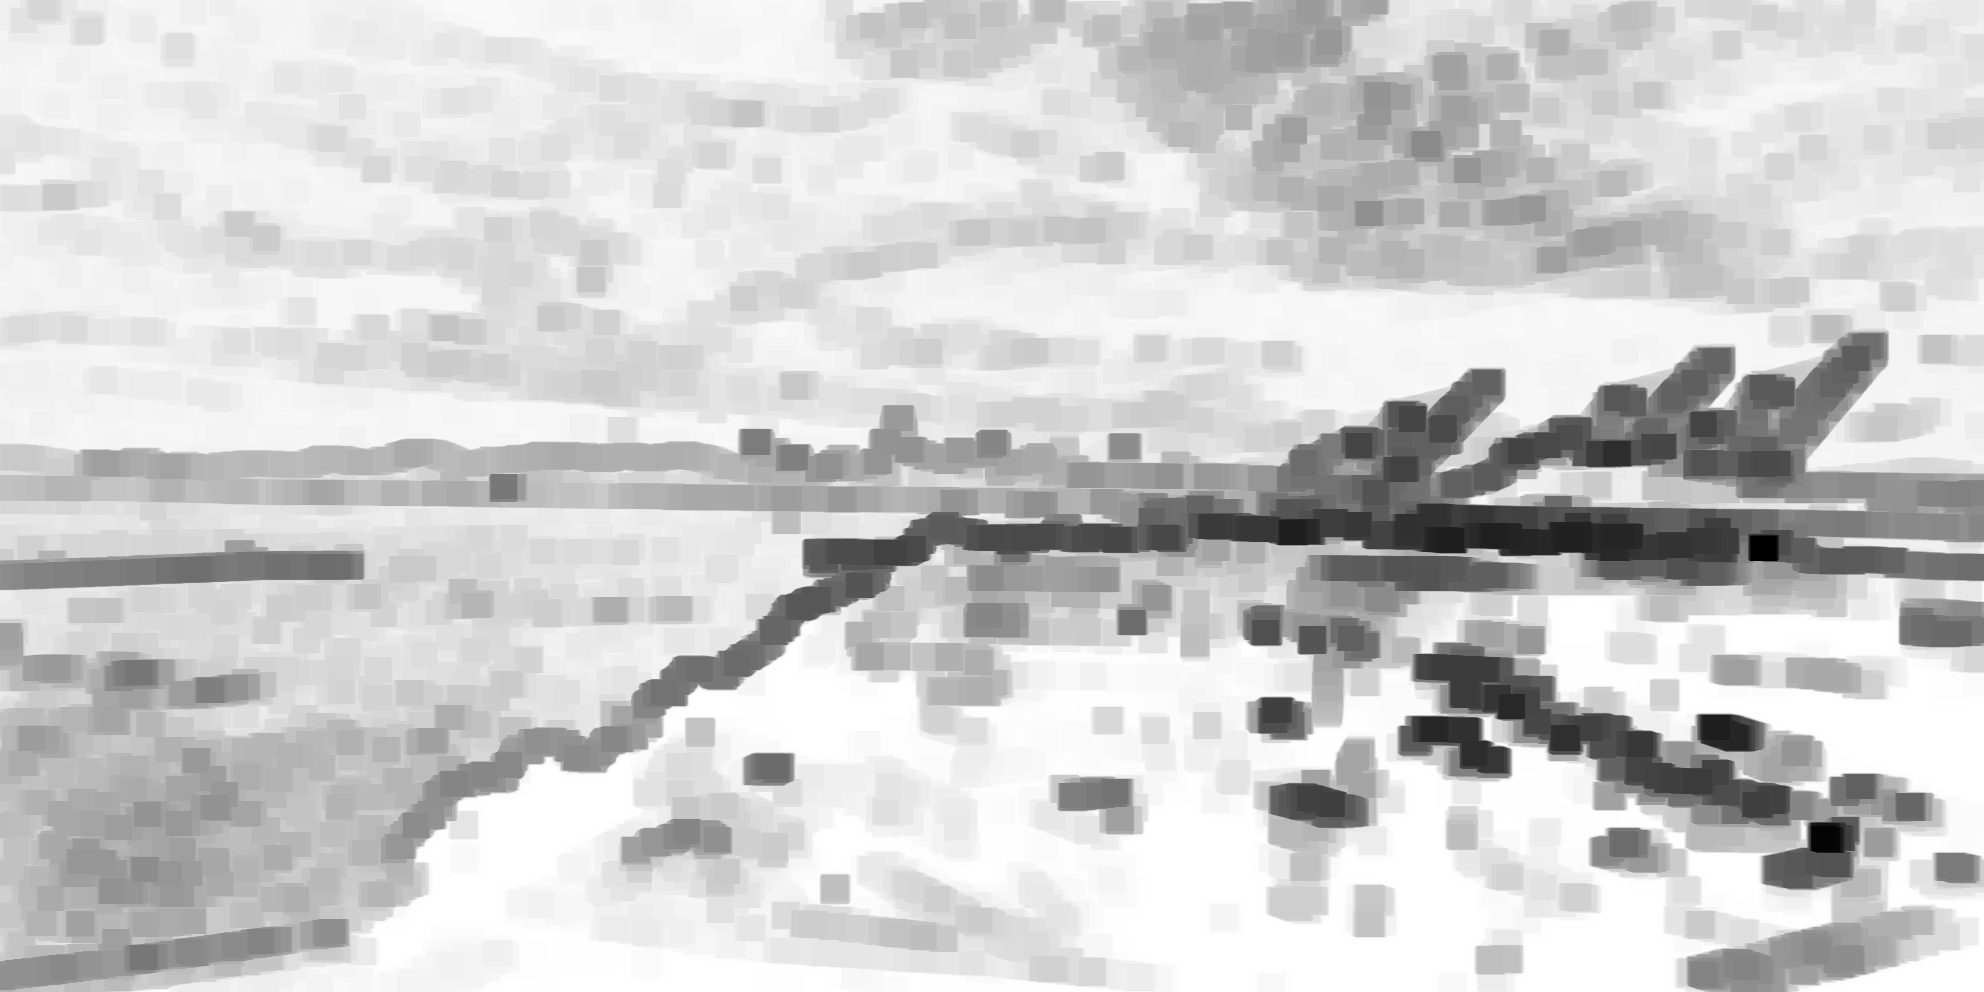

In [571]:
Image.fromarray((point.array_complexity*255).astype('uint8'))

plotRecPoints: done...took 1.58 sec
images/IMG_0290.jpg


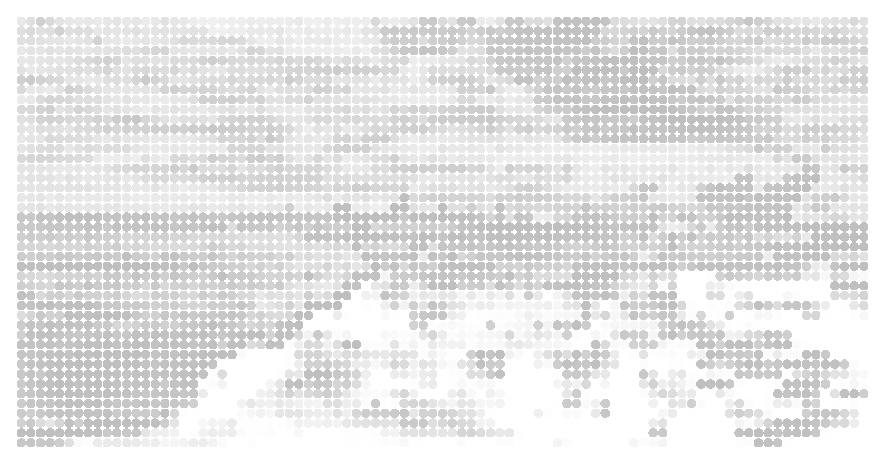

In [572]:
point._build_array()
point._newImage(point.border)
point._plotComplexityGrid(n=int(1/0.01), multiplier=0.5, fill=True)
point.display()

In [577]:
then = time.time()
point._makeProbabilityMask(0.01, power = 1.3)
print('took %0.2f seconds' %(time.time() - then))

took 1.40 seconds


In [590]:
point._newImage(point.border)
%prun point.plotRandomPointsComplexityGrad(n=1e5, constant=0.015, power=1.3, alpha='currently_hardcoded')

plotRandomPointsComplexity: done...took 53.46 sec
 

In [ ]:
"""   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   100000   10.683    0.000   29.682    0.000 pointillism.py:140(_getColorOfPixel)
  1200000    8.438    0.000    8.438    0.000 {built-in method numpy.core.multiarray.array}
   100000    5.907    0.000    5.907    0.000 {method 'draw_ellipse' of 'ImagingDraw' objects}
   100000    5.360    0.000    5.360    0.000 {method 'paste' of 'ImagingCore' objects}
        1    2.886    2.886   53.473   53.473 pointillism.py:276(plotRandomPointsComplexityGrad)
  1357037    2.676    0.000    2.676    0.000 pointillism.py:353(_testProbability)
   300000    2.546    0.000   13.401    0.000 index_tricks.py:26(ix_)
   300000    2.104    0.000    2.104    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   300000    1.508    0.000    5.140    0.000 _methods.py:53(_mean)
   100000    1.088    0.000   46.666    0.000 pointillism.py:162(_plotColorPoint)
   100000    0.944    0.000    0.944    0.000 {built-in method PIL._imaging.fill}
   300000    0.878    0.000    0.931    0.000 _methods.py:43(_count_reduce_items)
   900000    0.831    0.000    1.367    0.000 numerictypes.py:728(issubdtype)
   100000    0.805    0.000    0.805    0.000 pointillism.py:240(_getRadiusFromComplexity)
   900000    0.800    0.000    0.800    0.000 {method 'reshape' of 'numpy.ndarray' objects}
   100000    0.494    0.000    6.395    0.000 Image.py:1274(paste)
   800001    0.412    0.000    0.412    0.000 {built-in method builtins.hasattr}
   100000    0.406    0.000    2.328    0.000 Image.py:2134(new)
  2400000    0.383    0.000    0.383    0.000 {built-in method builtins.issubclass}
   100000    0.345    0.000    0.561    0.000 ImageDraw.py:48(__init__)
  4171111    0.310    0.000    0.310    0.000 {method 'random' of '_random.Random' objects}
   200000    0.288    0.000    0.288    0.000 Image.py:502(__init__)
   300000    0.285    0.000    5.425    0.000 {method 'mean' of 'numpy.ndarray' objects}
   400000    0.281    0.000    0.388    0.000 Image.py:763(load)
   900000    0.281    0.000    8.540    0.000 numeric.py:463(asarray)
   100000    0.273    0.000    0.424    0.000 Image.py:522(_new)
  1000004    0.271    0.000    0.271    0.000 {built-in method builtins.isinstance}
   900000    0.265    0.000    0.421    0.000 numerictypes.py:660(issubclass_)
   100000    0.261    0.000    0.822    0.000 ImageDraw.py:270(Draw)
   100000    0.134    0.000    6.304    0.000 ImageDraw.py:141(ellipse)"""

# Test coverage plotting

In [920]:
%run pointillism.py

In [921]:
# Create instance on directory or filename
point = pointillize(location='images/DJI_0219.jpg', debug=True, plot_coverage=True, use_coverage=True)

# Crop
point.crop_Y([1000,500], False)

In [922]:
point.plotRandomPointsComplexity(n=5e5, constant=0.015, power=1.3, alpha='currently_hardcoded', use_gradient=False)  

plotRandomPointsComplexity: done...took 337.60 sec


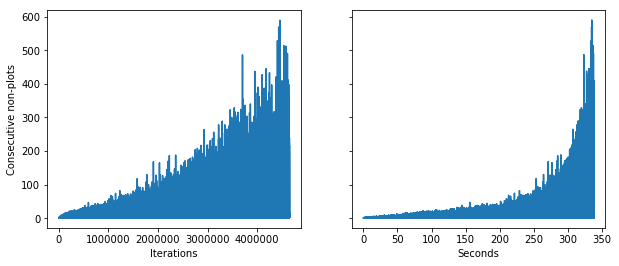

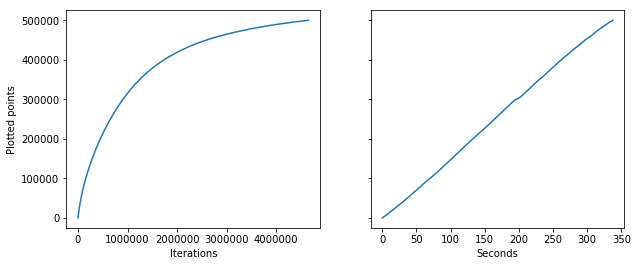

In [928]:
#from matplotlib import pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(point.count_list)
ax2.plot(point.time_list, point.count_list)
ax1.set_ylabel('Consecutive non-plots')
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Seconds')
f.set_figwidth(10)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(point.point_list)
ax2.plot(point.time_list, point.point_list)
ax1.set_ylabel('Plotted points')
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Seconds')
f.set_figwidth(10)
#plt.figure()
#plt.plot(point.time_list)
plt.show()

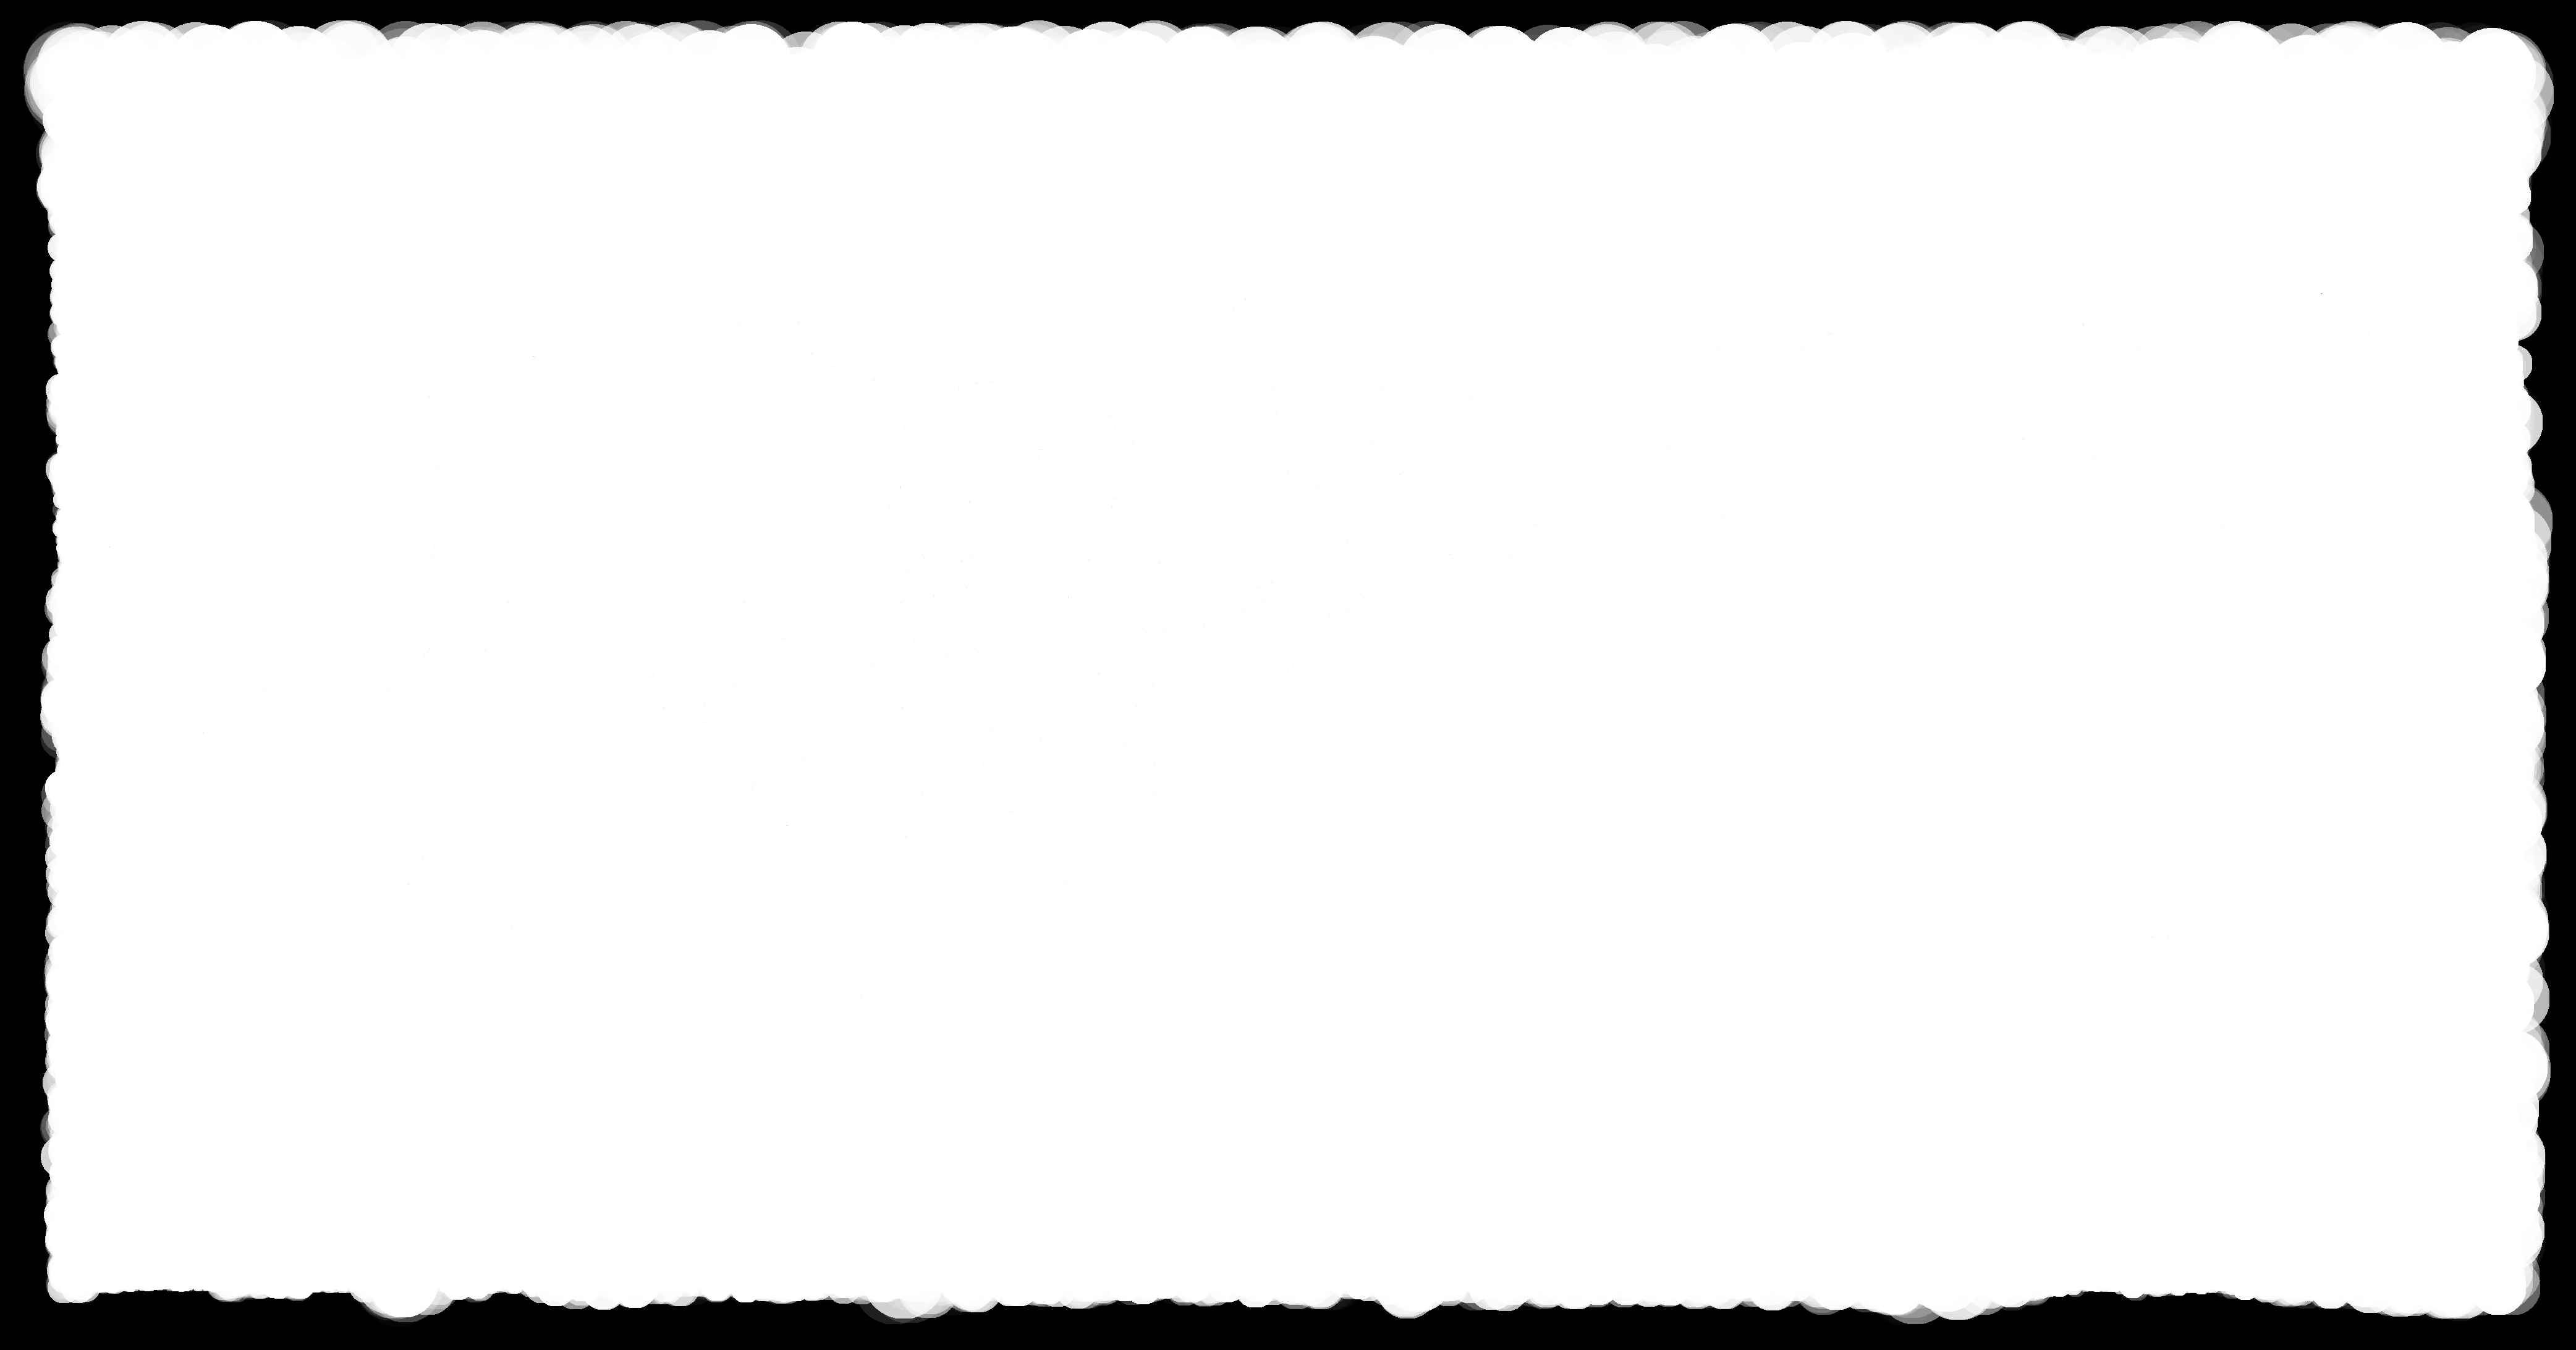

In [929]:
point.out_coverage

In [925]:
point.out.resize([1000,500])
point.save_out(location='etc/', suffix='cubed_basic_complexity_330sec')

# Documentation

In [5]:
# Help on module
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
                pointillizePile
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPointsComplexity(self, n, constant, power)
     |      plots random points over image, where constant is
     |      the portion of the width for the max size of the bubble,
     |      and power pushes the distribution towards smaller bubbles
     |  
